# Linear Regression预测房价

In [1]:
import numpy as np # 数组常用库
import pandas as pd # 读入csv常用库
from sklearn.linear_model import LinearRegression # sk-learn库Linear Regression模型
from sklearn.model_selection import train_test_split # sk-learn库训练与测试
from sklearn import metrics # 生成各项测试指标库
import matplotlib.pyplot as plt # 画图常用库
import math #数学库

从../input/kc_house_data.csv文件中读入数据

In [31]:
data = pd.read_csv('../input/kc_house_data.csv')
print(data.shape)
data.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

获得自变量X和因变量Y

In [114]:
X = data[['bedrooms','bathrooms','sqft_living', 'floors', 'condition','grade', 'yr_built']]
Y = data['price']

X.head()

,bedrooms,bathrooms,sqft_living,floors,condition,grade,yr_built
0,3,1.00,1180,1.0,3,7,1955
1,3,2.25,2570,2.0,3,7,1951
2,2,1.00,770,1.0,3,6,1933
3,4,3.00,1960,1.0,5,7,1965
4,3,2.00,1680,1.0,3,8,1987


获得2:1的训练：测试数据比例

In [115]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=1/3, random_state=0)

In [116]:
xtrain = np.asmatrix(xtrain)
xtest = np.asmatrix(xtest)
ytrain = np.ravel(ytrain)
ytest = np.ravel(ytest)

观察房价和生活面积的关系

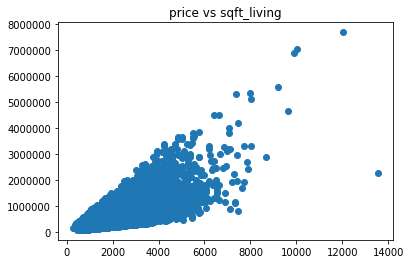

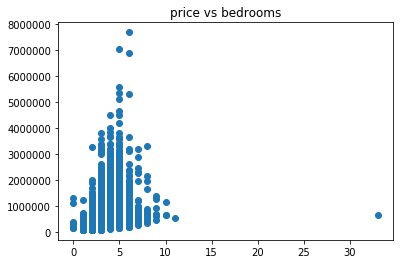

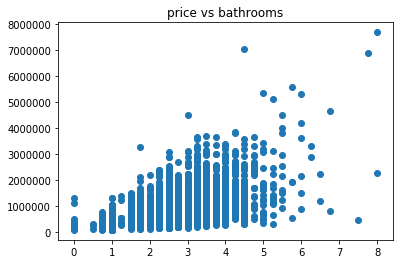

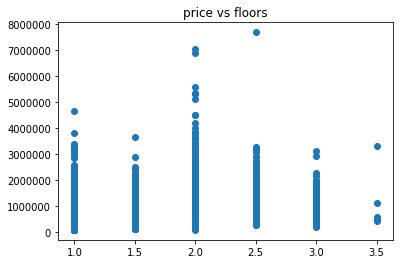

In [117]:
plt.scatter(X['sqft_living'], Y)
plt.title('price vs sqft_living')
plt.show()

plt.scatter(X['bedrooms'], Y)
plt.title('price vs bedrooms')
plt.show()

plt.scatter(X['bathrooms'], Y)
plt.title('price vs bathrooms')
plt.show()

plt.scatter(X['floors'], Y)
plt.title('price vs floors')
plt.show()


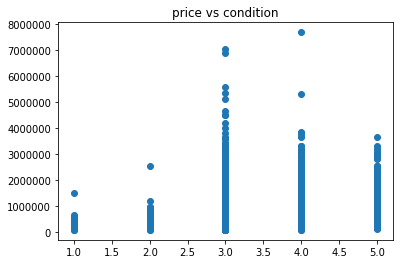

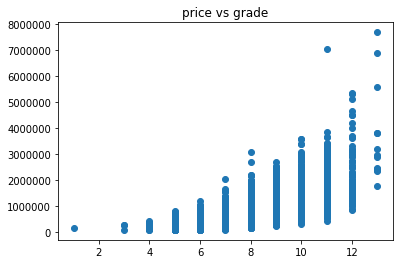

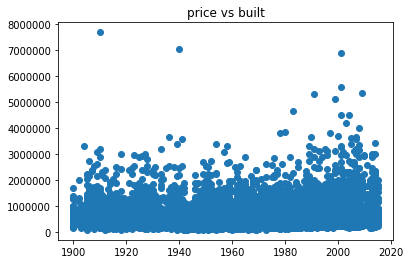

In [118]:
plt.scatter(X['condition'], Y)
plt.title('price vs condition')
plt.show()

plt.scatter(X['grade'], Y)
plt.title('price vs grade')
plt.show()

plt.scatter(X['yr_built'], Y)
plt.title('price vs built')
plt.show()

观察生活面积分布

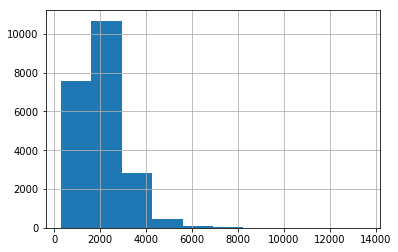

In [119]:
X['sqft_living'].hist()
plt.show()

用xtrain和ytrain训练模型

In [120]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [121]:
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,bedrooms,-41898.097097
1,bathrooms,46887.920314
2,sqft_living,175.214246
3,floors,25699.559352
4,condition,22212.008785
5,grade,132452.941450
6,yr_built,-3909.549144


In [122]:
model.intercept_

6795130.449067405

In [102]:
#一个房子，3个卧室，2个卫生间，2500sqft，2层楼，预测房价
# model.predict([[3, 2, 2500, 2]])

训练集上的均方差MSE 和 平均相对误差

In [127]:
pred = model.predict(xtrain)
MSE_train = ((pred - ytrain) ** 2).sum() / len(ytrain)
RMSD_train = MSE_train ** 0.5
print(RMSD_train)

ERR_train = (abs(pred - ytrain) / ytrain).sum() / len(ytrain)
print(ERR_train)

224366.8438276458
0.3013914758914126


训练集合上的MSE

In [128]:
pred_test = model.predict(xtest)
MSE_test = ((pred_test - ytest) ** 2).sum() / len(ytest)
RMSD_test = MSE_test ** 0.5
print(RMSD_test)


ERR_test = (abs(pred_test - ytest) / ytest).sum() / len(ytest)
print(ERR_test)

233558.7450138395
0.29253953997286636
